In [39]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_grid(start, end, jump):
    values = []
    h = start
    while h <= end:
        values.append(h)
        h += jump
    return values

In [49]:
def f(x):
    return x ** 2

In [55]:
def df(x, y=None):
    return 2 * x

In [51]:
def plotar(funcao, aproximacao):
    # Realizando plot
    # Convertendo respostas para numpy
    x_num, y_num = 1, 1
    #beta_num = np.array(solution).astype(float).flatten()

    # Gerando a malha (grid)
    x_min, x_max = -50, 50
    #x_grid = np.linspace(x_min, x_max, 100)
    xf_grid = get_grid(x_min, x_max, h)
    xe_grid = get_grid(x_min, x_max, h)
    # Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
    e_grid = aproximacao(x_min, x_max, y, h)
    f_grid = []
    for x in xf_grid:
        f_grid.append(funcao(x))
    # Instruções do plot
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(xf_grid, f_grid, linewidth = 3) # reta
    ax.plot(xe_grid, e_grid, 'o') # reta
    ax.plot(x_num, y_num, linestyle = "None") # pontos do conjunto de dados

    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(x_min, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["$f(x)$", "$aproximação$"], loc = "upper left", fontsize = 15)
    ax.grid(True)

    plt.show()

In [83]:
y, h = 2500, 2.5

# Método de Euler

In [53]:
def met_euler(a, b, y, h):
    valores = []
    x = a
    while x <= b:
        y_ = y + h * df(x)
        valores.append(y_)
        x += h
        y = y_
    return valores

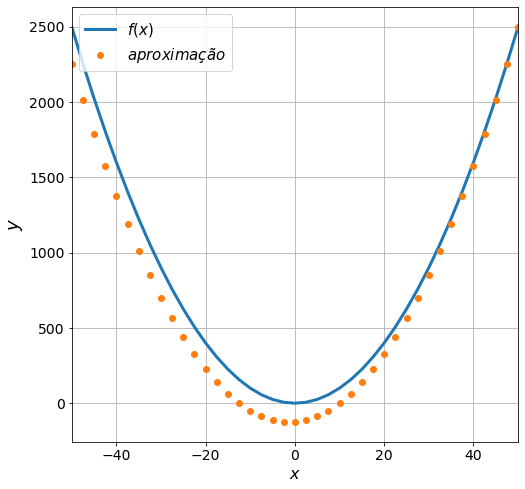

In [84]:
plotar(f, met_euler)

# Método de Euler Melhorado

In [65]:
def met_euler_melhorado(a, b, y, h):
    valores = []
    x = a
    while x <= b:
        yh = y + df(x, y) * h
        y_ = y + (h / 2) * (df(x, y) + df(x + h, yh))
        valores.append(y_)
        y = y_
        x += h
    return valores

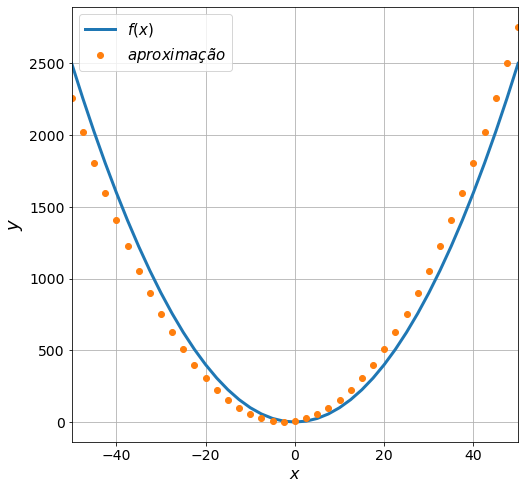

In [85]:
plotar(f, met_euler_melhorado)

# Método RK4

In [77]:
def met_rk4(a, b, y, h):
    valores = []
    x = a
    while x <= b:
        k1 = h * df(x, y)
        k2 = h * df(x + h / 2, y + k1 / 2)
        k3 = h * df(x + h / 2, y + k2 / 2)
        k4 = h * df(x + h, y + k3)
        y_ = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        valores.append(y_)
        y = y_
        x += h
    return valores

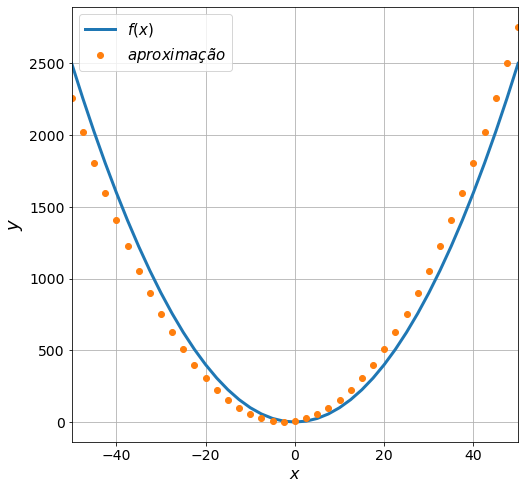

In [86]:
plotar(f, met_rk4)